In [5]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelEncoder 
import joblib

# Read the data 
data = pd.read_excel(r'/Users/haiyen/Downloads/vw_churndata.xlsx')

# Display the first few rows of the fetched data 
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,86243-KER,Female,63,True,Kerala,15,8,Deal 5,True,False,...,Mailed Check,-5.00,178.70,0.0,0,48.10,226.80,Churned,Attitude,Attitude of service provider
1,72036-PUN,Male,25,False,Punjab,11,33,Deal 4,False,False,...,Bank Withdrawal,-3.00,446.10,0.0,0,0.00,446.10,Churned,Attitude,Attitude of service provider
2,57779-ASS,Male,30,True,Assam,7,29,NaN,True,False,...,Credit Card,19.25,19.25,0.0,0,12.81,32.06,Churned,Attitude,Attitude of service provider
3,16794-TEL,Male,47,False,Telangana,9,3,NaN,True,False,...,Mailed Check,19.70,19.70,0.0,0,1.91,21.61,Churned,Attitude,Attitude of service provider
4,31546-KER,Male,31,False,Kerala,15,5,NaN,True,False,...,Bank Withdrawal,19.90,19.90,0.0,0,7.49,27.39,Churned,Attitude,Attitude of service provider


In [6]:
# Drop columns that won't be used for prediction
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)

 

# List of columns to be label encoded

columns_to_encode = [

    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',

    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',

    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',

    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',

    'Payment_Method'

]

 

# Encode categorical variables except the target variable

label_encoders = {}

for column in columns_to_encode:

    label_encoders[column] = LabelEncoder()

    data[column] = label_encoders[column].fit_transform(data[column])

 

# Manually encode the target variable 'Customer_Status'

data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

 

# Split data into features and target

X = data.drop('Customer_Status', axis=1)

y = data['Customer_Status']

 

# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Confusion Matrix:
[[774  52]
 [130 246]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.89       826
           1       0.83      0.65      0.73       376

    accuracy                           0.85      1202
   macro avg       0.84      0.80      0.81      1202
weighted avg       0.85      0.85      0.84      1202



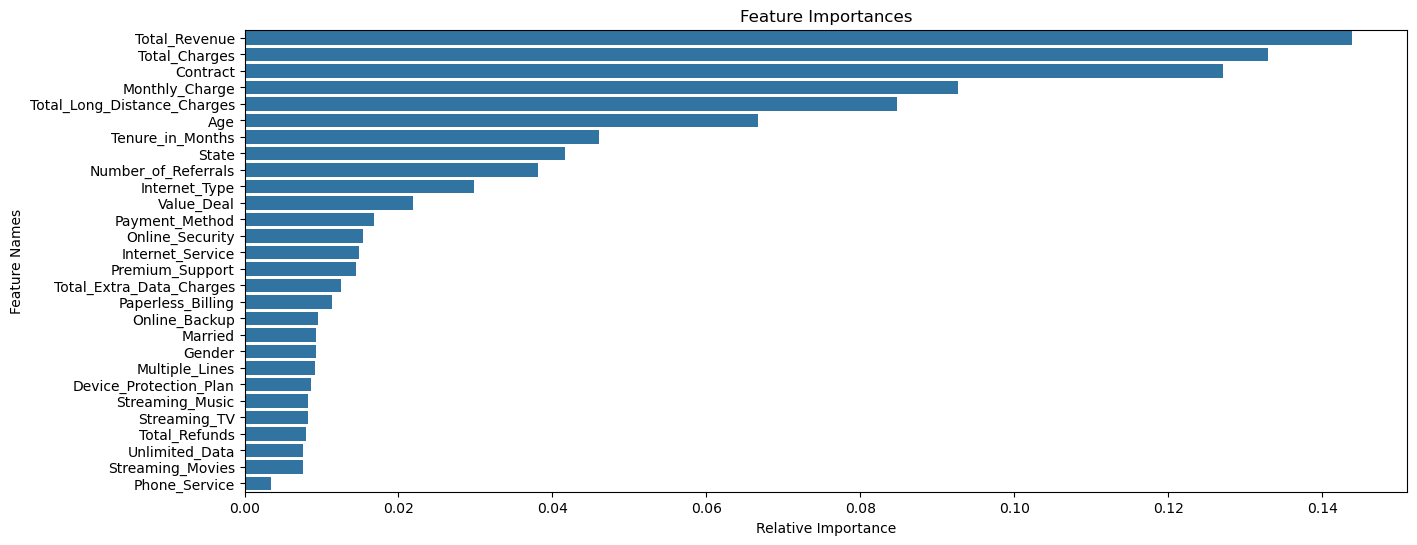

In [7]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


# Train the model

rf_model.fit(X_train, y_train)
 
#Evaluate Model

# Make predictions

y_pred = rf_model.predict(X_test)


# Evaluate the model

print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")

print(classification_report(y_test, y_pred))

 

# Feature Selection using Feature Importance

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

 

# Plot the feature importances

plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [13]:
# Define the path to the Joiner Data Excel file
file_path = r"/Users/haiyen/Downloads/vw_joindata.xlsx"

# Define the sheet name to read data from
sheet_name = 'Sheet1'

# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(new_data.head())

# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
churned_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the filtered results to Excel
# Changed to save the filtered DataFrame (churned_data) instead of the original
churned_data.to_excel(r"/Users/haiyen/Downloads/Vw_JoinData.xlsx", index=False)

  Customer_ID  Gender  Age  Married          State  Number_of_Referrals  \
0   32586-UTT  Female   25    False  Uttar Pradesh                   15   
1   46004-TAM    Male   25     True     Tamil Nadu                    1   
2   47624-TAM  Female   62     True     Tamil Nadu                    7   
3   64095-BIH    Male   27    False          Bihar                    2   
4   56460-MAH    Male   38     True    Maharashtra                   12   

   Tenure_in_Months Value_Deal  Phone_Service  Multiple_Lines  ...  \
0                10        NaN           True            True  ...   
1                 6        NaN           True           False  ...   
2                29        NaN           True           False  ...   
3                17        NaN           True           False  ...   
4                23     Deal 5           True           False  ...   

   Monthly_Charge Total_Charges  Total_Refunds  Total_Extra_Data_Charges  \
0            -8.0         25.75            0.0      

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Customer_Status_Predicted
